In [166]:
import pandas as pd
import numpy as np

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tools.eval_measures import rmse, aic

import matplotlib.pyplot as plt
%matplotlib inline

import datetime

In [167]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)
pd.plotting.register_matplotlib_converters()
np.set_printoptions(suppress=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [2]:
import requests
from pandas.io.json import json_normalize
import pandas as pd

url="https://www.datos.gov.co/resource/gt2j-8ykr.json?$limit=1000000000"
Datos=pd.read_json(url,convert_dates=['fecha_de_notificaci_n','fecha_de_muerte','fis','fecha_diagnostico','fecha_recuperado','fecha_reporte_web'])

In [169]:
Datos.rename(columns={'id_de_caso':'id_caso','fecha_de_notificaci_n':'fecha_notificacion','c_digo_divipola':'codigo_municipio','ciudad_de_ubicaci_n':'ciudad',
                      'atenci_n':'atencion','tipo':'tipo_contagio','estado':'estado','pa_s_de_procedencia':'pais_procedencia','fis':'fecha_sintomas',
                      'tipo_recuperaci_n':'tipo_recuperacion','fecha_de_muerte':'fecha_muerte'},inplace=True)

In [170]:
Datos

,id_caso,fecha_notificacion,codigo_municipio,ciudad,departamento,atencion,edad,sexo,tipo_contagio,estado,pais_procedencia,fecha_sintomas,fecha_diagnostico,fecha_recuperado,fecha_reporte_web,tipo_recuperacion,codigo_departamento,codigo_pais,pertenencia_etnica,nombre_grupo_etnico,fecha_muerte
0,1,2020-03-02,11001,Bogotá D.C.,Bogotá D.C.,Recuperado,19,F,Importado,Leve,ITALIA,2020-02-27T00:00:00.000,2020-03-06,2020-03-13,2020-03-06,PCR,11,380.0,Otro,NaN,NaT
1,2,2020-03-06,76111,Guadalajara de Buga,Valle del Cauca,Recuperado,34,M,Importado,Leve,ESPAÑA,2020-03-04T00:00:00.000,2020-03-09,2020-03-19,2020-03-09,PCR,76,724.0,Otro,NaN,NaT
2,3,2020-03-07,5001,Medellín,Antioquia,Recuperado,50,F,Importado,Leve,ESPAÑA,2020-02-29T00:00:00.000,2020-03-09,2020-03-15,2020-03-09,PCR,5,724.0,Otro,NaN,NaT
3,4,2020-03-09,5001,Medellín,Antioquia,Recuperado,55,M,Relacionado,Leve,NaN,2020-03-06T00:00:00.000,2020-03-11,2020-03-26,2020-03-11,PCR,5,NaN,Otro,NaN,NaT
4,5,2020-03-09,5001,Medellín,Antioquia,Recuperado,25,M,Relacionado,Leve,NaN,2020-03-08T00:00:00.000,2020-03-11,2020-03-23,2020-03-11,PCR,5,NaN,Otro,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624064,624105,2020-08-23,11001,Bogotá D.C.,Bogotá D.C.,Casa,31,M,En estudio,Asintomático,NaN,Asintomático,2020-08-28,NaT,2020-09-01,NaN,11,NaN,NaN,NaN,NaT
624065,624106,2020-08-28,11001,Bogotá D.C.,Bogotá D.C.,Casa,43,M,En estudio,Asintomático,NaN,Asintomático,2020-08-31,NaT,2020-09-01,NaN,11,NaN,NaN,NaN,NaT
624066,624107,2020-08-23,11001,Bogotá D.C.,Bogotá D.C.,Casa,74,F,En estudio,Asintomático,NaN,Asintomático,2020-08-29,NaT,2020-09-01,NaN,11,NaN,NaN,NaN,NaT
624067,624108,2020-08-27,11001,Bogotá D.C.,Bogotá D.C.,Casa,39,F,En estudio,Asintomático,NaN,Asintomático,2020-08-31,NaT,2020-09-01,NaN,11,NaN,NaN,NaN,NaT


In [171]:
def funcionEstado(row):
  if row['atencion'] == 'Fallecido':
     val = 'Fallecido'
  elif  row['atencion'] == 'Recuperado':
     val = 'Recuperado' 
  else:
     val = 'Activo'
  return val
       


In [172]:
Datos['estadoPorRegistro'] = Datos.apply(funcionEstado,axis=1) 

In [173]:
Datos

,id_caso,fecha_notificacion,codigo_municipio,ciudad,departamento,atencion,edad,sexo,tipo_contagio,estado,pais_procedencia,fecha_sintomas,fecha_diagnostico,fecha_recuperado,fecha_reporte_web,tipo_recuperacion,codigo_departamento,codigo_pais,pertenencia_etnica,nombre_grupo_etnico,fecha_muerte,estadoPorRegistro
0,1,2020-03-02,11001,Bogotá D.C.,Bogotá D.C.,Recuperado,19,F,Importado,Leve,ITALIA,2020-02-27T00:00:00.000,2020-03-06,2020-03-13,2020-03-06,PCR,11,380.0,Otro,NaN,NaT,Recuperado
1,2,2020-03-06,76111,Guadalajara de Buga,Valle del Cauca,Recuperado,34,M,Importado,Leve,ESPAÑA,2020-03-04T00:00:00.000,2020-03-09,2020-03-19,2020-03-09,PCR,76,724.0,Otro,NaN,NaT,Recuperado
2,3,2020-03-07,5001,Medellín,Antioquia,Recuperado,50,F,Importado,Leve,ESPAÑA,2020-02-29T00:00:00.000,2020-03-09,2020-03-15,2020-03-09,PCR,5,724.0,Otro,NaN,NaT,Recuperado
3,4,2020-03-09,5001,Medellín,Antioquia,Recuperado,55,M,Relacionado,Leve,NaN,2020-03-06T00:00:00.000,2020-03-11,2020-03-26,2020-03-11,PCR,5,NaN,Otro,NaN,NaT,Recuperado
4,5,2020-03-09,5001,Medellín,Antioquia,Recuperado,25,M,Relacionado,Leve,NaN,2020-03-08T00:00:00.000,2020-03-11,2020-03-23,2020-03-11,PCR,5,NaN,Otro,NaN,NaT,Recuperado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624064,624105,2020-08-23,11001,Bogotá D.C.,Bogotá D.C.,Casa,31,M,En estudio,Asintomático,NaN,Asintomático,2020-08-28,NaT,2020-09-01,NaN,11,NaN,NaN,NaN,NaT,Activo
624065,624106,2020-08-28,11001,Bogotá D.C.,Bogotá D.C.,Casa,43,M,En estudio,Asintomático,NaN,Asintomático,2020-08-31,NaT,2020-09-01,NaN,11,NaN,NaN,NaN,NaT,Activo
624066,624107,2020-08-23,11001,Bogotá D.C.,Bogotá D.C.,Casa,74,F,En estudio,Asintomático,NaN,Asintomático,2020-08-29,NaT,2020-09-01,NaN,11,NaN,NaN,NaN,NaT,Activo
624067,624108,2020-08-27,11001,Bogotá D.C.,Bogotá D.C.,Casa,39,F,En estudio,Asintomático,NaN,Asintomático,2020-08-31,NaT,2020-09-01,NaN,11,NaN,NaN,NaN,NaT,Activo


In [174]:
var_df = Datos.groupby(['fecha_reporte_web','estadoPorRegistro']).size().reset_index()
print("df shape: ", var_df.shape)

df shape:  (486, 3)


In [175]:
var_df.head()

,fecha_reporte_web,estadoPorRegistro,0
0,2020-03-06,Recuperado,1
1,2020-03-09,Recuperado,2
2,2020-03-11,Recuperado,6
3,2020-03-12,Recuperado,5
4,2020-03-13,Recuperado,5


In [176]:
pivotTable3 = pd.pivot_table(var_df,index=['fecha_reporte_web'], columns = 'estadoPorRegistro',fill_value=0)
pivotTable3.tail()

0                     
estadoPorRegistro Activo Fallecido Recuperado
fecha_reporte_web                            
2020-08-28         7923   134       441      
2020-08-29         9045   110       239      
2020-08-30         7740   80        204      
2020-08-31         7176   53        1        
2020-09-01         8901   0         0

In [177]:
flattened = pd.DataFrame(pivotTable3.to_records())


In [178]:
flattened

,fecha_reporte_web,"(0, 'Activo')","(0, 'Fallecido')","(0, 'Recuperado')"
0,2020-03-06,0,0,1
1,2020-03-09,0,0,2
2,2020-03-11,0,0,6
3,2020-03-12,0,0,5
4,2020-03-13,0,0,5
...,...,...,...,...
172,2020-08-28,7923,134,441
173,2020-08-29,9045,110,239
174,2020-08-30,7740,80,204
175,2020-08-31,7176,53,1


In [179]:
flattened.columns = [hdr.replace("(0, ", "").replace(")", "") \
                     for hdr in flattened.columns]

In [180]:
flattened

,fecha_reporte_web,'Activo','Fallecido','Recuperado'
0,2020-03-06,0,0,1
1,2020-03-09,0,0,2
2,2020-03-11,0,0,6
3,2020-03-12,0,0,5
4,2020-03-13,0,0,5
...,...,...,...,...
172,2020-08-28,7923,134,441
173,2020-08-29,9045,110,239
174,2020-08-30,7740,80,204
175,2020-08-31,7176,53,1


In [181]:
flattened.columns = [hdr.replace("'", "") \
                     for hdr in flattened.columns]

In [182]:
flattened

,fecha_reporte_web,Activo,Fallecido,Recuperado
0,2020-03-06,0,0,1
1,2020-03-09,0,0,2
2,2020-03-11,0,0,6
3,2020-03-12,0,0,5
4,2020-03-13,0,0,5
...,...,...,...,...
172,2020-08-28,7923,134,441
173,2020-08-29,9045,110,239
174,2020-08-30,7740,80,204
175,2020-08-31,7176,53,1


In [183]:
url="https://www.datos.gov.co/resource/8835-5baf.json?$limit=1000000000"
pruebas=pd.read_json(url,convert_dates=['fecha'])



In [184]:
pruebas

,fecha,acumuladas,amazonas,antioquia,arauca,atlantico,bogota,bolivar,boyaca,caldas,caqueta,casanare,cauca,cesar,choco,cordoba,cundinamarca,guainia,guajira,guaviare,huila,magdalena,meta,narino,norte_de_santander,putumayo,quindio,risaralda,san_andres,santander,sucre,tolima,valle_del_cauca,vaupes,vichada,procedencia_desconocida,positivas_acumuladas,negativas_acumuladas,positividad_acumulada,indeterminadas,barranquilla,cartagena,santa_marta
0,Acumulado Feb,601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-05T00:00:00.000,636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-06T00:00:00.000,739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-07T00:00:00.000,810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-08T00:00:00.000,813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,2020-08-28T00:00:00.000,2547838,14761.0,327862.0,7236.0,64836.0,843028.0,19267.0,37383.0,22947.0,11819.0,11224.0,18417.0,39609.0,20317.0,56874.0,97357.0,1991.0,24266.0,2151.0,38623.0,7110.0,51242.0,46115.0,40322.0,10363.0,10167.0,32313.0,2665.0,72687.0,39691.0,36982.0,194389.0,2814.0,1358.0,8884.0,660706.0,1877907.0,"25,9",9225.0,192821.0,99033.0,38914.0
178,2020-08-29T00:00:00.000,2572824,14764.0,331297.0,7276.0,65441.0,848917.0,19694.0,38054.0,23460.0,11968.0,11334.0,18963.0,40254.0,20391.0,57332.0,98463.0,1991.0,24571.0,2154.0,39745.0,7291.0,51810.0,46502.0,41245.0,10490.0,10232.0,32722.0,2702.0,74269.0,40143.0,37362.0,195728.0,2814.0,1387.0,8884.0,667403.0,1896222.0,"25,9",9199.0,194195.0,99714.0,39265.0
179,2020-08-30T00:00:00.000,2599703,15021.0,334111.0,7281.0,65489.0,860884.0,19990.0,38443.0,23805.0,12197.0,11359.0,19136.0,40750.0,20767.0,57976.0,99154.0,1991.0,24670.0,2385.0,39969.0,7317.0,52452.0,47021.0,41727.0,10821.0,10918.0,33212.0,2702.0,74852.0,40436.0,38010.0,197653.0,2814.0,1387.0,8884.0,674375.0,1916047.0,"25,9",9281.0,194565.0,100038.0,39516.0
180,2020-08-31T00:00:00.000,2625052,15032.0,336256.0,7459.0,65935.0,870408.0,20135.0,38966.0,24074.0,12701.0,11543.0,19261.0,41103.0,20785.0,58908.0,99680.0,2241.0,25076.0,2394.0,40833.0,7446.0,53058.0,47069.0,41966.0,10957.0,10980.0,33498.0,2763.0,76351.0,40834.0,38526.0,199356.0,2966.0,1641.0,8884.0,680974.0,1934723.0,"25,9",9355.0,195540.0,100482.0,39945.0


In [185]:
pruebas = pruebas.iloc[1:]


In [186]:
pruebas

,fecha,acumuladas,amazonas,antioquia,arauca,atlantico,bogota,bolivar,boyaca,caldas,caqueta,casanare,cauca,cesar,choco,cordoba,cundinamarca,guainia,guajira,guaviare,huila,magdalena,meta,narino,norte_de_santander,putumayo,quindio,risaralda,san_andres,santander,sucre,tolima,valle_del_cauca,vaupes,vichada,procedencia_desconocida,positivas_acumuladas,negativas_acumuladas,positividad_acumulada,indeterminadas,barranquilla,cartagena,santa_marta
1,2020-03-05T00:00:00.000,636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-06T00:00:00.000,739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-07T00:00:00.000,810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-08T00:00:00.000,813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2020-03-09T00:00:00.000,851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,2020-08-28T00:00:00.000,2547838,14761.0,327862.0,7236.0,64836.0,843028.0,19267.0,37383.0,22947.0,11819.0,11224.0,18417.0,39609.0,20317.0,56874.0,97357.0,1991.0,24266.0,2151.0,38623.0,7110.0,51242.0,46115.0,40322.0,10363.0,10167.0,32313.0,2665.0,72687.0,39691.0,36982.0,194389.0,2814.0,1358.0,8884.0,660706.0,1877907.0,"25,9",9225.0,192821.0,99033.0,38914.0
178,2020-08-29T00:00:00.000,2572824,14764.0,331297.0,7276.0,65441.0,848917.0,19694.0,38054.0,23460.0,11968.0,11334.0,18963.0,40254.0,20391.0,57332.0,98463.0,1991.0,24571.0,2154.0,39745.0,7291.0,51810.0,46502.0,41245.0,10490.0,10232.0,32722.0,2702.0,74269.0,40143.0,37362.0,195728.0,2814.0,1387.0,8884.0,667403.0,1896222.0,"25,9",9199.0,194195.0,99714.0,39265.0
179,2020-08-30T00:00:00.000,2599703,15021.0,334111.0,7281.0,65489.0,860884.0,19990.0,38443.0,23805.0,12197.0,11359.0,19136.0,40750.0,20767.0,57976.0,99154.0,1991.0,24670.0,2385.0,39969.0,7317.0,52452.0,47021.0,41727.0,10821.0,10918.0,33212.0,2702.0,74852.0,40436.0,38010.0,197653.0,2814.0,1387.0,8884.0,674375.0,1916047.0,"25,9",9281.0,194565.0,100038.0,39516.0
180,2020-08-31T00:00:00.000,2625052,15032.0,336256.0,7459.0,65935.0,870408.0,20135.0,38966.0,24074.0,12701.0,11543.0,19261.0,41103.0,20785.0,58908.0,99680.0,2241.0,25076.0,2394.0,40833.0,7446.0,53058.0,47069.0,41966.0,10957.0,10980.0,33498.0,2763.0,76351.0,40834.0,38526.0,199356.0,2966.0,1641.0,8884.0,680974.0,1934723.0,"25,9",9355.0,195540.0,100482.0,39945.0


In [187]:
pruebas['pruebas_diarias'] = pruebas['acumuladas'].diff().fillna(pruebas['acumuladas'].iloc[0])
#my_list = list(pruebas)
#print (my_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [188]:
pruebas

,fecha,acumuladas,amazonas,antioquia,arauca,atlantico,bogota,bolivar,boyaca,caldas,caqueta,casanare,cauca,cesar,choco,cordoba,cundinamarca,guainia,guajira,guaviare,huila,magdalena,meta,narino,norte_de_santander,putumayo,quindio,risaralda,san_andres,santander,sucre,tolima,valle_del_cauca,vaupes,vichada,procedencia_desconocida,positivas_acumuladas,negativas_acumuladas,positividad_acumulada,indeterminadas,barranquilla,cartagena,santa_marta,pruebas_diarias
1,2020-03-05T00:00:00.000,636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,636.0
2,2020-03-06T00:00:00.000,739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.0
3,2020-03-07T00:00:00.000,810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.0
4,2020-03-08T00:00:00.000,813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
5,2020-03-09T00:00:00.000,851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,2020-08-28T00:00:00.000,2547838,14761.0,327862.0,7236.0,64836.0,843028.0,19267.0,37383.0,22947.0,11819.0,11224.0,18417.0,39609.0,20317.0,56874.0,97357.0,1991.0,24266.0,2151.0,38623.0,7110.0,51242.0,46115.0,40322.0,10363.0,10167.0,32313.0,2665.0,72687.0,39691.0,36982.0,194389.0,2814.0,1358.0,8884.0,660706.0,1877907.0,"25,9",9225.0,192821.0,99033.0,38914.0,28349.0
178,2020-08-29T00:00:00.000,2572824,14764.0,331297.0,7276.0,65441.0,848917.0,19694.0,38054.0,23460.0,11968.0,11334.0,18963.0,40254.0,20391.0,57332.0,98463.0,1991.0,24571.0,2154.0,39745.0,7291.0,51810.0,46502.0,41245.0,10490.0,10232.0,32722.0,2702.0,74269.0,40143.0,37362.0,195728.0,2814.0,1387.0,8884.0,667403.0,1896222.0,"25,9",9199.0,194195.0,99714.0,39265.0,24986.0
179,2020-08-30T00:00:00.000,2599703,15021.0,334111.0,7281.0,65489.0,860884.0,19990.0,38443.0,23805.0,12197.0,11359.0,19136.0,40750.0,20767.0,57976.0,99154.0,1991.0,24670.0,2385.0,39969.0,7317.0,52452.0,47021.0,41727.0,10821.0,10918.0,33212.0,2702.0,74852.0,40436.0,38010.0,197653.0,2814.0,1387.0,8884.0,674375.0,1916047.0,"25,9",9281.0,194565.0,100038.0,39516.0,26879.0
180,2020-08-31T00:00:00.000,2625052,15032.0,336256.0,7459.0,65935.0,870408.0,20135.0,38966.0,24074.0,12701.0,11543.0,19261.0,41103.0,20785.0,58908.0,99680.0,2241.0,25076.0,2394.0,40833.0,7446.0,53058.0,47069.0,41966.0,10957.0,10980.0,33498.0,2763.0,76351.0,40834.0,38526.0,199356.0,2966.0,1641.0,8884.0,680974.0,1934723.0,"25,9",9355.0,195540.0,100482.0,39945.0,25349.0


In [189]:
pruebas['fecha'] = pd.to_datetime(pruebas['fecha'])
pruebas

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,fecha,acumuladas,amazonas,antioquia,arauca,atlantico,bogota,bolivar,boyaca,caldas,caqueta,casanare,cauca,cesar,choco,cordoba,cundinamarca,guainia,guajira,guaviare,huila,magdalena,meta,narino,norte_de_santander,putumayo,quindio,risaralda,san_andres,santander,sucre,tolima,valle_del_cauca,vaupes,vichada,procedencia_desconocida,positivas_acumuladas,negativas_acumuladas,positividad_acumulada,indeterminadas,barranquilla,cartagena,santa_marta,pruebas_diarias
1,2020-03-05,636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,636.0
2,2020-03-06,739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.0
3,2020-03-07,810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.0
4,2020-03-08,813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
5,2020-03-09,851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,2020-08-28,2547838,14761.0,327862.0,7236.0,64836.0,843028.0,19267.0,37383.0,22947.0,11819.0,11224.0,18417.0,39609.0,20317.0,56874.0,97357.0,1991.0,24266.0,2151.0,38623.0,7110.0,51242.0,46115.0,40322.0,10363.0,10167.0,32313.0,2665.0,72687.0,39691.0,36982.0,194389.0,2814.0,1358.0,8884.0,660706.0,1877907.0,"25,9",9225.0,192821.0,99033.0,38914.0,28349.0
178,2020-08-29,2572824,14764.0,331297.0,7276.0,65441.0,848917.0,19694.0,38054.0,23460.0,11968.0,11334.0,18963.0,40254.0,20391.0,57332.0,98463.0,1991.0,24571.0,2154.0,39745.0,7291.0,51810.0,46502.0,41245.0,10490.0,10232.0,32722.0,2702.0,74269.0,40143.0,37362.0,195728.0,2814.0,1387.0,8884.0,667403.0,1896222.0,"25,9",9199.0,194195.0,99714.0,39265.0,24986.0
179,2020-08-30,2599703,15021.0,334111.0,7281.0,65489.0,860884.0,19990.0,38443.0,23805.0,12197.0,11359.0,19136.0,40750.0,20767.0,57976.0,99154.0,1991.0,24670.0,2385.0,39969.0,7317.0,52452.0,47021.0,41727.0,10821.0,10918.0,33212.0,2702.0,74852.0,40436.0,38010.0,197653.0,2814.0,1387.0,8884.0,674375.0,1916047.0,"25,9",9281.0,194565.0,100038.0,39516.0,26879.0
180,2020-08-31,2625052,15032.0,336256.0,7459.0,65935.0,870408.0,20135.0,38966.0,24074.0,12701.0,11543.0,19261.0,41103.0,20785.0,58908.0,99680.0,2241.0,25076.0,2394.0,40833.0,7446.0,53058.0,47069.0,41966.0,10957.0,10980.0,33498.0,2763.0,76351.0,40834.0,38526.0,199356.0,2966.0,1641.0,8884.0,680974.0,1934723.0,"25,9",9355.0,195540.0,100482.0,39945.0,25349.0


In [247]:
dfpreparado = pd.merge(flattened, pruebas, left_on='fecha_reporte_web', right_on='fecha')
dfpreparado = dfpreparado[['fecha_reporte_web','Activo','Fallecido','Recuperado','pruebas_diarias']]
#dfpreparado = dfpreparado.iloc[:-2]
dfpreparado 

,fecha_reporte_web,Activo,Fallecido,Recuperado,pruebas_diarias
0,2020-03-06,0,0,1,103.0
1,2020-03-09,0,0,2,38.0
2,2020-03-11,0,0,6,206.0
3,2020-03-12,0,0,5,260.0
4,2020-03-13,0,0,5,361.0
...,...,...,...,...,...
172,2020-08-28,7923,134,441,28349.0
173,2020-08-29,9045,110,239,24986.0
174,2020-08-30,7740,80,204,26879.0
175,2020-08-31,7176,53,1,25349.0


In [191]:
type(var_df['fecha_reporte_web'])

pandas.core.series.Series

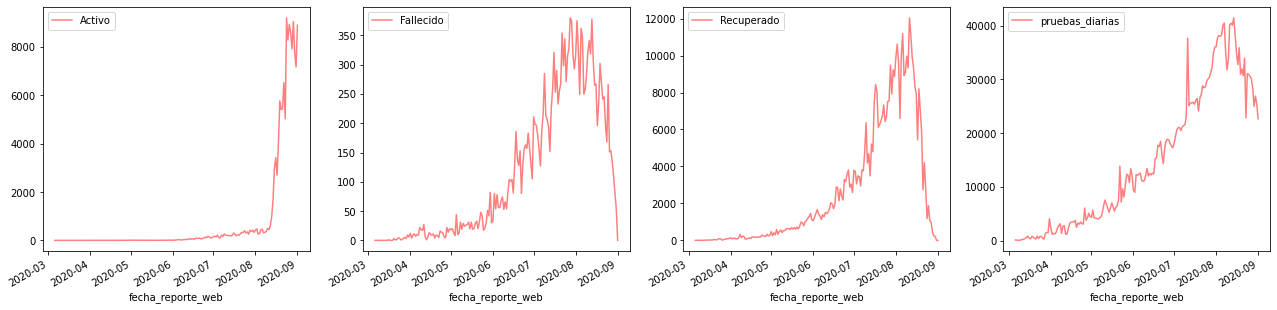

In [248]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(22,5))

for ycol, ax in zip(['Activo','Fallecido', 'Recuperado', 'pruebas_diarias'], axes):

    dfpreparado.plot(kind='line', x='fecha_reporte_web', y=ycol, ax=ax, alpha=0.5, color='r')

Checking for Causlity :
Granger causality is a concept of causality derived from the notion that causes may not occur after effects and that if one variable is the cause of another, knowing the status on the cause at an earlier point in time can enhance prediction of the effect at a later point in time

In [116]:
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False, maxlag=5):    
    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. 

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df 

In [148]:
grangers_causation_matrix(dfpreparado, variables = ['Activo', 'Recuperado', 'Fallecido', 'pruebas_diarias']) 

,Activo_x,Recuperado_x,Fallecido_x,pruebas_diarias_x
Activo_y,1.0000,0.0001,0.1100,0.0001
Recuperado_y,0.0000,1.0000,0.0189,0.0992
Fallecido_y,0.0000,0.0024,1.0000,0.0120
pruebas_diarias_y,0.0262,0.0000,0.0000,1.0000


The test Null Hypothesis is that the coefficients of the corresponding past values are zero; That is the X does not cause Y. The P-values in the table are lesser than our significance level (0.05), which implies that the Null Hypothesis can be rejected.


Checking for Cointegration :
Cointegration tests analyze non-stationary time series— processes that have variances and means that vary over time. In other words, the method allows you to estimate the long-run parameters or equilibrium in systems with unit root variables (Rao, 2007).

In [118]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

In [119]:
cointegration_test(dfpreparado[['Activo', 'Recuperado', 'Fallecido', 'pruebas_diarias']])

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Activo ::  104.27    > 40.1749   =>   True
Recuperado ::  46.93     > 24.2761   =>   True
Fallecido ::  16.8      > 12.3212   =>   True
pruebas_diarias ::  0.02      > 4.1296    =>   False


Train-Test Split

In [249]:
test_frec = 0.25
n_test = round((len(dfpreparado)) * test_frec)
df_train, df_test = dfpreparado[0:-n_test], dfpreparado[-n_test:]
# df_train_copy = df_train.copy()
df_train.drop('fecha_reporte_web',1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [250]:
n_test

44

In [251]:
len(dfpreparado)

177

In [252]:
len(df_train)

133

In [253]:
len(df_test)

44

In [254]:
df_train

,Activo,Fallecido,Recuperado,pruebas_diarias
0,0,0,1,103.0
1,0,0,2,38.0
2,0,0,6,206.0
3,0,0,5,260.0
4,0,0,5,361.0
...,...,...,...,...
128,214,257,4800,25733.0
129,306,321,7410,25359.0
130,246,253,8435,26055.0
131,187,290,8083,26422.0


In [194]:
df_test

,fecha_reporte_web,Activo,Fallecido,Recuperado,pruebas_diarias
133,2020-07-20,217,255,6255,26506.0
134,2020-07-21,282,267,6484,27131.0
135,2020-07-22,326,354,6710,28801.0
136,2020-07-23,323,298,7324,28434.0
137,2020-07-24,398,344,6426,28567.0
138,2020-07-25,305,271,6678,29541.0
139,2020-07-26,350,315,7516,30081.0
140,2020-07-27,255,327,7543,30312.0
141,2020-07-28,416,380,9488,31177.0
142,2020-07-29,370,375,7925,32196.0


Unit Root Test (checking for stationaity)
In statistics, a unit root test tests whether a time series variable is non-stationary and possesses a unit root. The null hypothesis is generally defined as the presence of a unit root and the alternative hypothesis is either stationarity, trend stationarity or explosive root depending on the test used.

In [124]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

In [125]:
# ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Activo" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 2.5441
 No. Lags Chosen       = 9
 Critical value 1%     = -3.486
 Critical value 5%     = -2.886
 Critical value 10%    = -2.58
 => P-Value = 0.9991. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Fallecido" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 3.3282
 No. Lags Chosen       = 13
 Critical value 1%     = -3.488
 Critical value 5%     = -2.887
 Critical value 10%    = -2.58
 => P-Value = 1.0. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Recuperado" 
    -----------------------------------------------
 Null Hypothesis: Data has 

In [256]:
# 1st difference
df_differenced = df_train.diff().dropna()
len(df_differenced)

132

In [230]:
# ADF Test on each column
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Activo" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.804
 No. Lags Chosen       = 8
 Critical value 1%     = -3.486
 Critical value 5%     = -2.886
 Critical value 10%    = -2.58
 => P-Value = 0.3785. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Fallecido" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.8735
 No. Lags Chosen       = 12
 Critical value 1%     = -3.488
 Critical value 5%     = -2.887
 Critical value 10%    = -2.58
 => P-Value = 0.0485. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Recuperado" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Sta

In [257]:
# 2nd Difference
df_differenced = df_differenced.diff().dropna()
len(df_differenced)

131

In [232]:
# ADF Test on each column
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Activo" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.5828
 No. Lags Chosen       = 13
 Critical value 1%     = -3.489
 Critical value 5%     = -2.887
 Critical value 10%    = -2.58
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Fallecido" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.191
 No. Lags Chosen       = 13
 Critical value 1%     = -3.489
 Critical value 5%     = -2.887
 Critical value 10%    = -2.58
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Recuperado" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Leve

Modeling

In [262]:
model = VAR(df_differenced[['Activo', 'Recuperado', 'Fallecido', 'pruebas_diarias']])

fitted = model.fit(6)
fitted.summary()


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 03, Sep, 2020
Time:                     00:33:33
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    40.1115
Nobs:                     125.000    HQIC:                   38.7681
Log likelihood:          -2975.02    FPE:                2.79934e+16
AIC:                      37.8489    Det(Omega_mle):     1.34999e+16
--------------------------------------------------------------------
Results for equation Activo
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                      0.136105         1.227450            0.111           0.912
L1.Activo                 -1.636315         0.096392          -16.976           0.000
L1.Recuperado             -0.015646    

Choosing number of lags to be inserted into the model is a matter of trial and error, and can be changed according to the regression results (above), the durbin-watson test results (will be explained in a moment), and other metrics (e.g., RMSE, MAE, etc.)

**Checking for Residuals' Autocorrelation**

We'll use Durbin-Watson test for this (denoted as d):

The value of d always lies between 0 and 4.

d = 2 indicates no autocorrelation.

If d < 2, there is evidence of positive serial correlation. As a rough rule of thumb, if d < 1.0, there may be cause > for alarm. Small values of d indicate successive error terms are positively correlated.

If d > 2, successive error terms are negatively correlated. In regressions, this can imply an underestimation of the > level of statistical significance.

In [260]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(fitted.resid)

for col, val in zip(dfpreparado[['Activo', 'Recuperado', 'Fallecido', 'pruebas_diarias']], out):
    print(col, ':', round(val, 2))

Activo : 2.29
Recuperado : 2.17
Fallecido : 2.39
pruebas_diarias : 2.02


**Forecasting**

In [263]:
# Get the lag order
lag_order = fitted.k_ar

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input


array([[    7.,   115.,  2918.,  -430.],
       [   33.,   -41., -2131.,   115.],
       [   64.,    32.,  3020.,  -506.],
       [ -152.,  -132., -1585.,  1070.],
       [    1.,   105., -1377.,  -329.],
       [  104.,   -94., -1618., -2710.]])

In [264]:
var_df_forecast = dfpreparado[['Activo', 'Recuperado', 'Fallecido', 'pruebas_diarias']]

fc = fitted.forecast(y=forecast_input, steps=n_test)
df_forecast = pd.DataFrame(fc, index=var_df_forecast.index[-n_test:], columns=var_df_forecast.columns + '_2d')
df_forecast

,Activo_2d,Recuperado_2d,Fallecido_2d,pruebas_diarias_2d
133,-828.902333,-3516.903423,4386.841866,34497.922002
134,1238.177045,-8029.758304,-1142.609791,-80942.024503
135,513.373225,21416.185430,-1078.944554,62612.464306
136,-2393.542045,-7214.270571,79.535759,5568.175985
137,2566.797047,595.147908,809.933219,19846.142090
138,-1635.415945,-5733.452250,-1878.456436,-97156.608735
139,-128.479783,-15728.160399,1881.739192,136918.129600
140,1068.293315,25489.112277,54.805568,-167328.676299
141,-374.321120,-15739.689469,-1348.931286,116017.708184
142,13.655479,26694.103071,1124.275963,-16066.808404


**Turning Forecasting into original values**

In [265]:
def invert_transformation(df_train, df_forecast, second_diff=False, third_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 3rd Diff
        if third_diff:
            df_fc[str(col)+'_2d'] = (df_train[col].iloc[-2]-df_train[col].iloc[-3]) + df_fc[str(col)+'_3d'].cumsum()
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [267]:
df_results = invert_transformation(df_train, df_forecast, second_diff=True, third_diff=False)        
df_results.loc[:, ['Activo_forecast', 'Recuperado_forecast', 'Fallecido_forecast', 'pruebas_diarias_forecast']]

,Activo_forecast,Recuperado_forecast,Fallecido_forecast,pruebas_diarias_forecast
133,-551.902333,626.096577,4562.841866,56233.922002
134,-97.627621,-12890.565151,7750.073942,7446.819500
135,870.020316,-4991.041449,9858.361464,21272.181305
136,-555.873792,-4305.788317,12046.184745,40665.719095
137,585.029147,-3025.387277,15043.941244,79905.398974
138,90.516141,-7478.438487,16163.241308,21988.470119
139,-532.476647,-27659.650096,19164.280562,100989.670863
140,-87.176121,-22351.749427,22220.125385,12662.195309
141,-16.196714,-32783.538228,23927.038922,40352.427938
142,68.438171,-16521.223958,26758.228421,51975.852163


In [268]:
df_results

,Activo_2d,Recuperado_2d,Fallecido_2d,pruebas_diarias_2d,Activo_1d,Activo_forecast,Fallecido_1d,Fallecido_forecast,Recuperado_1d,Recuperado_forecast,pruebas_diarias_1d,pruebas_diarias_forecast
133,-828.902333,-3516.903423,4386.841866,34497.922002,-783.902333,-551.902333,4329.841866,4562.841866,-5486.903423,626.096577,32154.922002,56233.922002
134,1238.177045,-8029.758304,-1142.609791,-80942.024503,454.274712,-97.627621,3187.232076,7750.073942,-13516.661728,-12890.565151,-48787.102501,7446.819500
135,513.373225,21416.185430,-1078.944554,62612.464306,967.647937,870.020316,2108.287522,9858.361464,7899.523702,-4991.041449,13825.361805,21272.181305
136,-2393.542045,-7214.270571,79.535759,5568.175985,-1425.894108,-555.873792,2187.823281,12046.184745,685.253132,-4305.788317,19393.537790,40665.719095
137,2566.797047,595.147908,809.933219,19846.142090,1140.902939,585.029147,2997.756499,15043.941244,1280.401040,-3025.387277,39239.679880,79905.398974
138,-1635.415945,-5733.452250,-1878.456436,-97156.608735,-494.513006,90.516141,1119.300063,16163.241308,-4453.051210,-7478.438487,-57916.928855,21988.470119
139,-128.479783,-15728.160399,1881.739192,136918.129600,-622.992788,-532.476647,3001.039255,19164.280562,-20181.211609,-27659.650096,79001.200744,100989.670863
140,1068.293315,25489.112277,54.805568,-167328.676299,445.300527,-87.176121,3055.844823,22220.125385,5307.900668,-22351.749427,-88327.475555,12662.195309
141,-374.321120,-15739.689469,-1348.931286,116017.708184,70.979407,-16.196714,1706.913537,23927.038922,-10431.788801,-32783.538228,27690.232629,40352.427938
142,13.655479,26694.103071,1124.275963,-16066.808404,84.634885,68.438171,2831.189499,26758.228421,16262.314270,-16521.223958,11623.424225,51975.852163


In [270]:
df_test
df_test.set_index('fecha_reporte_web',inplace=True)

In [271]:
df_test

,Activo,Fallecido,Recuperado,pruebas_diarias
fecha_reporte_web,,,,
2020-07-20,217,255,6255,26506.0
2020-07-21,282,267,6484,27131.0
2020-07-22,326,354,6710,28801.0
2020-07-23,323,298,7324,28434.0
2020-07-24,398,344,6426,28567.0
2020-07-25,305,271,6678,29541.0
2020-07-26,350,315,7516,30081.0
2020-07-27,255,327,7543,30312.0
2020-07-28,416,380,9488,31177.0


In [272]:
df_results['fecha_reporte_web'] = dfpreparado['fecha_reporte_web'][133:177]
#df_results.set_index('fecha_reporte_web',inplace=True)


In [276]:
df_results
#len(df_results)

,Activo_2d,Recuperado_2d,Fallecido_2d,pruebas_diarias_2d,Activo_1d,Activo_forecast,Fallecido_1d,Fallecido_forecast,Recuperado_1d,Recuperado_forecast,pruebas_diarias_1d,pruebas_diarias_forecast,fecha_reporte_web
133,-828.902333,-3516.903423,4386.841866,34497.922002,-783.902333,-551.902333,4329.841866,4562.841866,-5486.903423,626.096577,32154.922002,56233.922002,2020-07-20
134,1238.177045,-8029.758304,-1142.609791,-80942.024503,454.274712,-97.627621,3187.232076,7750.073942,-13516.661728,-12890.565151,-48787.102501,7446.819500,2020-07-21
135,513.373225,21416.185430,-1078.944554,62612.464306,967.647937,870.020316,2108.287522,9858.361464,7899.523702,-4991.041449,13825.361805,21272.181305,2020-07-22
136,-2393.542045,-7214.270571,79.535759,5568.175985,-1425.894108,-555.873792,2187.823281,12046.184745,685.253132,-4305.788317,19393.537790,40665.719095,2020-07-23
137,2566.797047,595.147908,809.933219,19846.142090,1140.902939,585.029147,2997.756499,15043.941244,1280.401040,-3025.387277,39239.679880,79905.398974,2020-07-24
138,-1635.415945,-5733.452250,-1878.456436,-97156.608735,-494.513006,90.516141,1119.300063,16163.241308,-4453.051210,-7478.438487,-57916.928855,21988.470119,2020-07-25
139,-128.479783,-15728.160399,1881.739192,136918.129600,-622.992788,-532.476647,3001.039255,19164.280562,-20181.211609,-27659.650096,79001.200744,100989.670863,2020-07-26
140,1068.293315,25489.112277,54.805568,-167328.676299,445.300527,-87.176121,3055.844823,22220.125385,5307.900668,-22351.749427,-88327.475555,12662.195309,2020-07-27
141,-374.321120,-15739.689469,-1348.931286,116017.708184,70.979407,-16.196714,1706.913537,23927.038922,-10431.788801,-32783.538228,27690.232629,40352.427938,2020-07-28
142,13.655479,26694.103071,1124.275963,-16066.808404,84.634885,68.438171,2831.189499,26758.228421,16262.314270,-16521.223958,11623.424225,51975.852163,2020-07-29


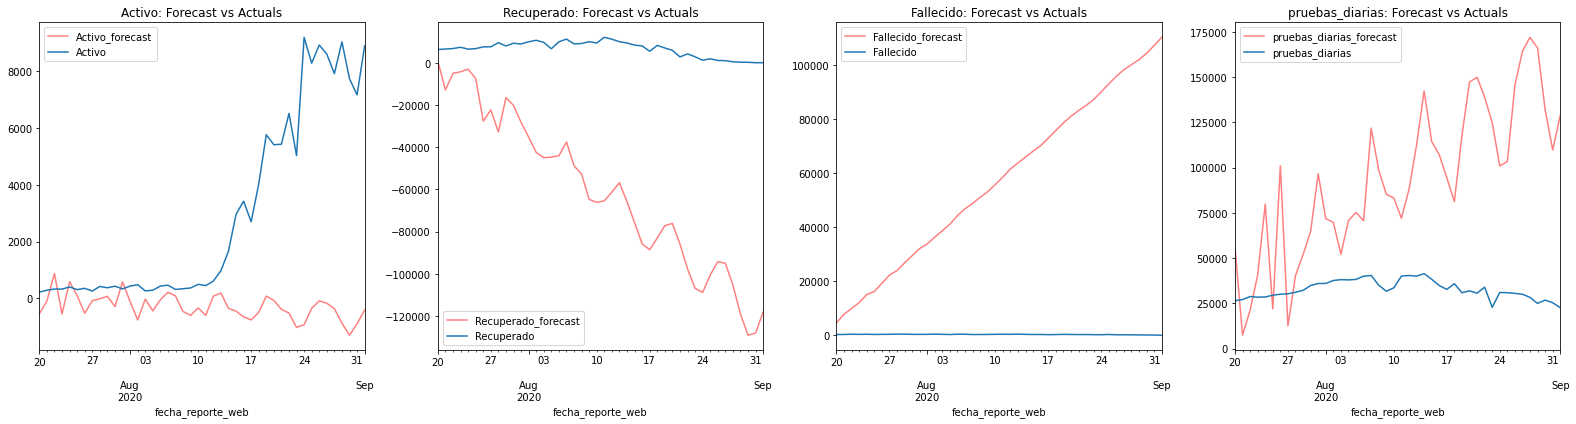

In [278]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(22,6))

for col, ax in zip(['Activo', 'Recuperado', 'Fallecido', 'pruebas_diarias'], axes):

    df_results.plot(kind='line', y=[col+'_forecast'], x='fecha_reporte_web', ax=ax, alpha=0.5, color='r', legend=True).autoscale(axis='x',tight=True)
    df_test[col][-n_test:].plot(legend=True, ax=ax)
    ax.set_title(col + ": Forecast vs Actuals")
plt.tight_layout();

In [279]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})


In [280]:
print('\nForecast Accuracy of: Activo')
accuracy_prod = forecast_accuracy(df_results['Activo_forecast'].values, df_test['Activo'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

print('\nForecast Accuracy of: Recuperado')
accuracy_prod = forecast_accuracy(df_results['Recuperado_forecast'].values, df_test['Recuperado'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

print('\nForecast Accuracy of: Fallecido')
accuracy_prod = forecast_accuracy(df_results['Fallecido_forecast'].values, df_test['Fallecido'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

print('\nForecast Accuracy of: pruebas_diarias')
accuracy_prod = forecast_accuracy(df_results['pruebas_diarias_forecast'].values, df_test['pruebas_diarias'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))


Forecast Accuracy of: Activo
mape :  1.3713
me :  -3216.6677
mae :  3261.0439
mpe :  -1.2402
rmse :  4756.7744
corr :  -0.4298
minmax :  1.337

Forecast Accuracy of: Recuperado
mape :  inf
me :  -67550.0516
mae :  67550.0516
mpe :  -inf
rmse :  75930.626
corr :  0.6561
minmax :  inf

Forecast Accuracy of: Fallecido
mape :  inf
me :  57042.5874
mae :  57042.5874
mpe :  inf
rmse :  64969.8773
corr :  -0.733
minmax :  0.9908

Forecast Accuracy of: pruebas_diarias
mape :  2.0349
me :  60691.3473
mae :  63073.8625
mpe :  1.9519
rmse :  73838.7824
corr :  -0.0839
minmax :  0.6068


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
